In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [2]:
data = np.loadtxt('data2.txt', delimiter = ',')
X,y = data[:,:2], data[:,2]
m=y.size
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [3]:
def featureNormalize(X):
    X_norm = preprocessing.normalize(X)
    return X_norm, X_norm.mean(axis=0), X_norm.std(axis=0) 

In [4]:
X_norm, mean, std = featureNormalize(X)
print('Mean: ', mean)
print('Standard Deviation: ',std)

Mean:  [0.99999841 0.00171549]
Standard Deviation:  [8.59473201e-07 4.94386241e-04]


In [5]:
X = np.concatenate([np.ones((m,1)),X_norm], axis=1)
print(X.shape)

(47, 3)


In [6]:
# Gradient Descent with multiple variables

In [7]:
def computeCostMulti(X,y,theta):
    m = y.size
    J = np.sum((X.dot(theta) - y) ** 2)/(2 * m)
    return J

In [8]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = y.size
 
    for iteration in range(iterations):
        
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - alpha * gradient
        cost = computeCostMulti(X, y, theta)
        cost_history[iteration] = cost
 
    return theta, cost_history

theta computed from gradient descent: [1.70153701e+05 1.70153677e+05 1.45682035e+02]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $281264214


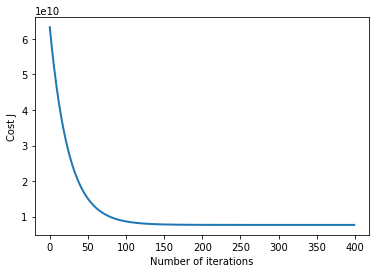

In [9]:
# Choose some alpha value - change this
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = np.dot([1650,3,1], theta)
   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

In [10]:
def normalEqn(X,y):
    X_transpose = X.T  
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y) 
    return theta
    

In [11]:
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = np.dot([1650,3,1],theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [ 7.61530058e+10 -7.61523054e+10 -2.80655730e+08]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $125423721934439
